In [1]:
import sklearn
import pandas as pd

df = pd.read_csv("liver.csv")
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [2]:
from sklearn.preprocessing import OrdinalEncoder, normalize
from sklearn.model_selection import train_test_split

pd.set_option('future.no_silent_downcasting', True)

# Split the data into features (X) and target (y)
X = df.drop(['Stage'], axis=1)
enc_columns = ['Status', 'Sex', 'Drug', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
enc_categories = [
    ['C', 'CL', 'D'],
    ['M', 'F'],
    ['Placebo', 'D-penicillamine'],
    ['N', 'Y'],
    ['N', 'Y'],
    ['N', 'Y'],
    ['N', 'S', 'Y'],
]
encoder = OrdinalEncoder(categories=enc_categories)
X[enc_columns] = encoder.fit_transform(X[enc_columns])
X = normalize(X)

y = df['Stage']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialise MLPClassifier
clf = MLPClassifier(random_state=2, max_iter=300)

# Step 2: Fit the model
clf.fit(X_train, y_train)


/Users/sawzedong/Desktop/Infocomm/Event Planning/BuildingBloCS/sklearn-final/venv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=2)

In [4]:
# Step 3: Predict results
predictions = clf.predict(X_test)

# Step 4: Evaluate model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy", accuracy)


Accuracy 0.5794


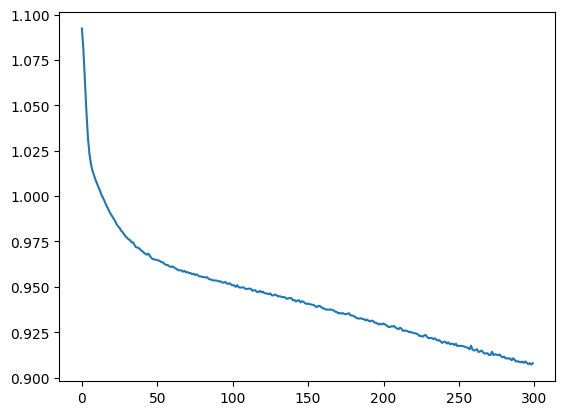

In [5]:
import matplotlib.pyplot as plt

plt.plot(range(0, clf.n_iter_), clf.loss_curve_)
